In [32]:
from __future__ import division 
from IPython.display import Latex

# On Galerkin approximations for the QG equations
## Supplementary material 
<p></p> 
### Cesar B. Rocha*, William R. Young, and Ian Grooms 
<p></p> 
### Winter 2015
<p></p> 
*Scripps Institution of Oceanography, University of California, San Diego, 9500 Gilman Dr. MC 0213, La Jolla, CA/USA, <crocha@ucsd.edu>   

# Can we get a sine out of cosines? 
##An elementary example of Galerkin approximation

Consider the linear boundary value problem

\begin{equation}
\phi'' + \phi = 0\, ,
\end{equation}
with boundary conditions

\begin{equation}
@z = 0 \qquad \phi' = 1  \, ,
\end{equation}
and
\begin{equation}
@z = \pi \qquad \phi' = -1  \, .
\end{equation}
<p></p>
The most general exact solution is
\begin{equation}
\phi(x) = \sin  z + C\cos  z\, ,
\end{equation}
<p></p>

where $C$ is an undetermined constant. A solution can be found as a linear combination of the eigenfunctions of the linear operator $D_2 \equiv d\,^2/d\, z^2$:

\begin{equation}
\phi = \sum_{n=0}^{\infty} \phi_n\,\mathrm{e}_n\,.
\end{equation}

If we define the $\mathrm{e}_n$ as the eigenfunctions of $D_2$  with inhomogeneous boundary conditions, the series above is truncated and gives the exact solution. With homogeneous boundary conditions the series is infinite.  We define

\begin{equation}
D_2 \, \mathrm{e}_n = -\lambda_n^2\, \mathrm{e}_n\,,
\end{equation}
and

\begin{equation}
@z = 0\,,\pi:\qquad \mathrm{e}_n' = 0\,.
\end{equation}



 The Galerkin approximation represents the solution as a truncated series in this orthogonal basis:
\begin{equation}
\phi^{\mathrm{N}}_G = \sum_{n=0}^{\mathrm{N}} \phi_n\,\mathrm{e}_n\,,
\end{equation}
<p></p>
Th eigenproblem above is a simplified Sturm-Liouville problem (e.g. Strang CSE book). The eigenfunctions are orthogonal because the operator $D_2$ is self-ajoint. It is convenient to normalize the eigenfunctions $\mathrm{e}_n$ to have unit $L_2$-norm

\begin{equation}
\frac{1}{\pi}\int_{0}^{\pi} \mathrm{e}_n\,\mathrm{e}_m = \delta_{mn} \,,
\end{equation}
<p></p>
Thus we have 

\begin{equation}
\mathrm{e}_0 = 1 \qquad \text{and} \qquad \mathrm{e}_n = \sqrt{2} \cos n \,z\,.
\end{equation}

The coefficients $\phi_n$ are determined to minimize the $L_2$-norm of the residual 

\begin{equation}
E(\phi_0, \phi_1, \cdots \phi_N)  \equiv \frac{1}{\pi} \int_{0}^{\pi} \left( \phi - \sum_{n=0}^{\mathrm{N}} \phi_n \mathrm{e}_n\right)^2 \, d\, z \, .
\end{equation}
Thus


\begin{equation}
\phi_n = \frac {1}{\pi} \int_{0}^{\pi} \mathrm{e}_n \phi  \, d z\, .
\end{equation}


That is, the n'th coefficient is the projection of the true solution onto the n'th eigenfunction. **The Galerkin approximation is therefore the best least-squares approximation using the truncated series in the basis spanned by $\mathrm{e}_n$**. 
<p></p>
At this point, one might be tempted to introduce the Galerkin series $\phi^{\mathrm{N}}_G$ into the governing equation to obtain $\phi_n$. This **naïve approach** leads to

\begin{equation}
\sum_{n=0}^{\mathrm{N}} (1-n^2)\phi_n\,\mathrm{e}_n = 0\,,
\end{equation}
<p></p>
from which one might wrongly conclude that $\phi_n = 0,\,n\neq 1$; $\phi_1$ is undetermined (this is correct). This approach only capturues part of the exact solution $C\,\cos z$; it does not approximates the sine term by a seires of cosines. This **naïve approach** gives the wrong because the truncated series for ${\phi^{\mathrm{N}}_G}'$ does not converge at $z=0,\,\pi$. **While the Galerkin series converges whithin the domain, one should never differentiate it term-by-term**.

<p></p>
Instead, to determine $\phi_n$ we project the exact equation onto the  n'th eigenfunction $\mathrm{e}_n$. That is, we multiply the exact equation  by $\tfrac{1}{\pi}\mathrm{e}_n$ and integrate over the domain:
<p></p>

\begin{equation}
\frac{1}{\pi}\int_0^{\pi}\mathrm{e}_n\,y'' d\,z + \frac{1}{\pi}\int_0^{\pi}\mathrm{e}_n\,y d\,z = 0\,.
\end{equation}
<p></p>
We have to move the derivatives off $y$. As most of exciting things in applied mathematics, this is possible using integration by parts

\begin{equation}
\frac{1}{\pi}\int_0^{\pi}\mathrm{e}_n\,y'' \,dz = \frac{1}{\pi}\int_0^{\pi}\mathrm{e}_n''\,y + \frac{1}{\pi}\left[\mathrm{e}_n\,y' - \mathrm{e}_n'\,y  \right] \,dz\,.
\end{equation}
<p></p>
Using the definition of $\mathrm{e}_n$ and the boundary conditions on $y$ and $\mathrm{e}_n$, we finally obtain
<p></p>
\begin{equation}
\phi_0 = \frac{2}{\pi}\qquad \text{and}\qquad\phi_n = \frac{2\,\sqrt{2}}{\pi\left(1-n^2\right)}\,,\qquad n \text{ even}\,\,.
\end{equation}
<p></p>
Notice that $\phi_1$ (the coefficient of $\cos z$) is undetermined as in the exact solution. Thus, the Galerkin approximate solution is 

\begin{equation}
\phi^{\mathrm{N}}_G = \frac{2}{\pi} + \phi_1 \cos z+ \frac{4}{\pi} \sum_{n=2,\text{ even}}^{\mathrm{N}} \frac{\cos n z}{1-n^2}\,.
\end{equation}


## Comparison with exact solution
We now comparare the Galerkin approximation againt the exact solution. For simplicity we take $C = \phi_1 = 0$.

In [116]:
import numpy as np
from numpy import sqrt,pi,sin,cos

# the exact solution
z = np.linspace(0,pi,100)
phi_exact = sin(z)

In [121]:
def Galerkin_solution(N,z):
    """Computes the Galerkin solution with phi_1 = 0 
        -------------------------------
        Inputs: N: truncation index 
                z: array of depths  
        -------------------------------  """
    
    n = np.arange(2,N+1,2)
    phi = np.zeros(z.size)
    for i in range(z.size):
        phi[i] = 2/pi + (4/pi)*( ( cos(n*z[i])/(1-n**2) ).sum() )
    
    return phi
    
    

We now compute the galerkin solutin for various $\mathrm{N}$

In [135]:
N = np.arange(0,20,2)

phi_galerkin = np.zeros((N.size,z.size))

for i in range(N.size):
    phi_galerkin[i,:] = Galerkin_solution(N[i],z)


In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.25})

import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=3., rc={"lines.linewidth": 1.5})
sns.set_style("darkgrid",{'grid_color':.95})

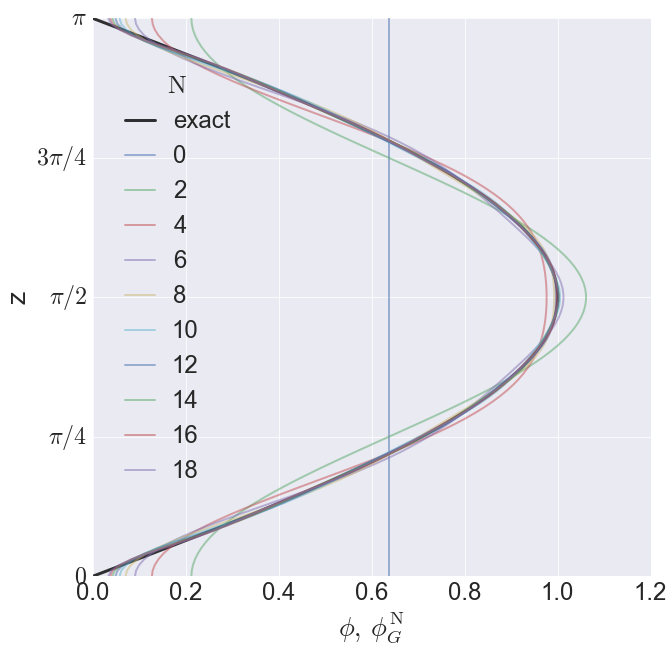

In [158]:
plt.figure(figsize=(10,10))
plt.plot(phi_exact,z,'k',linewidth=3.,alpha=.8,label='exact')
for i in range(N.size):
    plt.plot(phi_galerkin[i,:],z,linewidth=2,alpha=.5,label=str(N[i]))
plt.xlabel(r'$\phi,\,\phi^{\mathrm{N}}_G$')
plt.ylabel(r'z')
plt.yticks([0,pi/4,pi/2,3*pi/4,pi],[r'$0$',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
plt.ylim(0,pi)
plt.legend(loc=(.04,.15), title = r'$\mathrm{N} $')
plt.savefig('galerk_sin_cos',format='eps')

While the galerkin approximation $\phi^{\mathrm{N}}_G$ does not satisfies the inhomogeneous boundary conditions the solution with moderate $\mathrm{N}$ provides an acceptable approximation to the exact solution $\phi$.  However, the convergence near the boundaries is slow. To see this, note that the error at the bounries is

\begin{equation}
E_b = \frac{4}{\pi}\sum_{n=N+1, \text{even}}^{\infty}\frac{1}{1-n^{2}}
\end{equation}
An assymptotic estimate is
\begin{equation}
E_b \sim -\frac{4}{\pi}\sum_{n=N+1, \text{even}}^{\infty}\frac{1}{n^{2}}\approx -\frac{4}{\pi}\int  \frac{1}{\mathrm{N}^2} = \frac{4}{\pi \mathrm{N}}
\end{equation}
<p></p>
Thus, at the boundaries, the Galerkin series converges at rate $\sim\mathrm{N}^{-1}$. Let's test this against our computational estimates.

In [169]:
N2 = np.arange(0,1000,2)
phi_galerkin2 = np.zeros((N.size,z.size))

for i in range(N.size):
    phi_galerkin2[i,:] = Galerkin_solution(N[i],z)

Notice that the absolute error at $z=0$ (or at $z=\phi$) is simply $\phi^{\mathrm{N}}_G (0)$. We plot this value against $\mathrm{N}$ in a log$_{10}\times\log_{10}$ space. For reference we also plot the line $\mathrm{N}^{-1}$. 

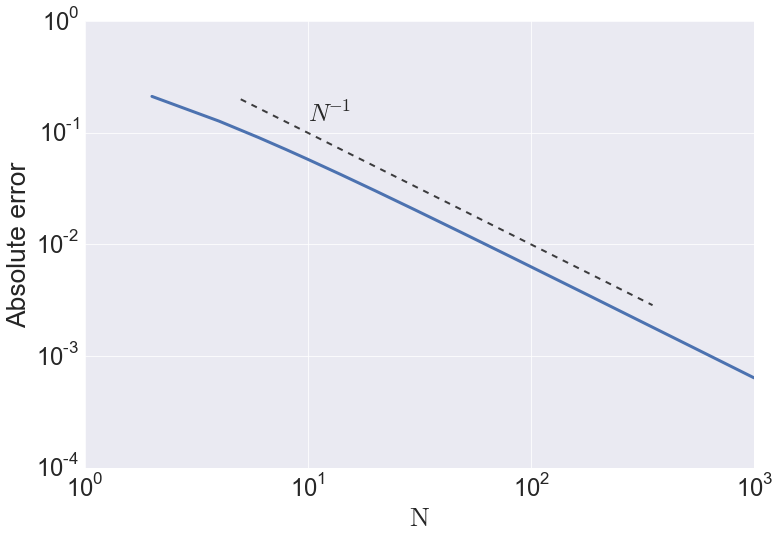

In [168]:
n1 = np.array([5,350])

plt.figure(figsize=(12,8))
plt.loglog(N2,phi_galerkin2[:,0],linewidth=3)
plt.loglog(n1,1/n1,'k--',alpha=.75,linewidth=2)
plt.text(10,.125,r'$N^{-1}$')
plt.xlabel(r'$\mathrm{N}$')
plt.ylabel(r'Absolute error')
plt.savefig('galerk_error',format='eps')

The convergence rate is $\mathrm{N^{-1}}$ just as estimated from the Galerkin series.